# 1.0 IMPORTS

In [1]:
import re
import requests
import pandas    as pd
import numpy     as np
import seaborn   as sns
from   datetime  import datetime
from   bs4       import BeautifulSoup

# 2.0 WEB SCRAPPING 

## 2.1 Classics

In [21]:
# Parametros para conexao

url = 'https://books.toscrape.com/catalogue/category/books/classics_6/index.html'
headers = {'User-Agent': 'Chrome/50.0.2661.102'}
page = requests.get( url, headers=headers )
soup = BeautifulSoup(page.text, 'html.parser')

In [23]:
# vitrine
product_list = soup.find('ol', class_='row' )

# nome do livro
book_details = product_list.find_all('h3')
book_ref  = [p.find('a') for p in book_details]
book_title = [p.get('title') for p in book_ref]

book_name=pd.DataFrame(book_title)
book_name.columns=['title']

# disponibilidade do livro
book_av=product_list.find_all('p','instock availability')
stock=[p.text.strip() for p in book_av]

book_st=pd.DataFrame(stock)
book_st.columns=['stock']


# preco do livro
book_price = product_list.find_all('p',class_='price_color')
price=[p.text[2:] for p in book_price]

book_pr=pd.DataFrame(price)
book_pr.columns=['price']



# avaliacao do livro
book_rate= product_list.find_all('p',class_='star-rating')
a=[p.get('class') for p in book_rate]

getting_rate=[]
for i in range (len(a)):
    getting_rate.append(a[i][1])

book_r=pd.DataFrame(getting_rate)
book_r.columns=['rate']


df_classics = pd.concat([book_name, book_pr, book_r, book_st], axis=1)



# categoria do livro
df_classics['category'] = soup.find(class_='page-header action').text.strip()

# scrap time
df_classics['scrap_time']=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# limpando avaliacao    
df_classics['rate']=df_classics['rate'].apply(lambda x:        0 if x == 'Zero'  else
                                                               1 if x == 'One'   else
                                                               2 if x == 'Two'   else
                                                               3 if x == 'Three' else
                                                               4 if x == 'Four'  else 5)


In [24]:
df_classics

,title,price,rate,stock,category,scrap_time
0,The Secret Garden,15.08,4,In stock,Classics,2021-09-25 17:00:38
1,The Metamorphosis,28.58,1,In stock,Classics,2021-09-25 17:00:38
2,The Pilgrim's Progress,50.26,2,In stock,Classics,2021-09-25 17:00:38
3,The Hound of the Baskervilles (Sherlock Holmes...,14.82,2,In stock,Classics,2021-09-25 17:00:38
4,Little Women (Little Women #1),28.07,4,In stock,Classics,2021-09-25 17:00:38
5,Gone with the Wind,32.49,3,In stock,Classics,2021-09-25 17:00:38
6,Candide,58.63,3,In stock,Classics,2021-09-25 17:00:38
7,Animal Farm,57.22,3,In stock,Classics,2021-09-25 17:00:38
8,Wuthering Heights,17.73,3,In stock,Classics,2021-09-25 17:00:38
9,The Picture of Dorian Gray,29.70,2,In stock,Classics,2021-09-25 17:00:38


## 2.2 Science Fiction

In [25]:
# Parametros para conexao

url = 'https://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page = requests.get( url, headers=headers )
soup = BeautifulSoup(page.text, 'html.parser')


sf_showroom=soup.find('ol','row')

In [26]:
# title
bk1=sf_showroom.find_all('h3')
bk2=[p.find('a') for p in bk1]
bk_t1=[p.get('title') for p in bk2]

bk_t=pd.DataFrame(bk_t1)
bk_t.columns=['title']


# price
bkp = sf_showroom.find_all('div','product_price')
bk_p1 = [p.find('p','price_color').text[2:] for p in bkp]
bk_p=pd.DataFrame(bk_p1)
bk_p.columns=['price']


# rate
bkr=sf_showroom.find_all('p','star-rating')
bkr1=[p.get('class') for p in bkr]

bk_r1=[]
for i in range(len(bkr1)):
    bk_r1.append(bkr1[i][1])
bk_r=pd.DataFrame(bk_r1)    
bk_r.columns=['rate']

               
# stock
bks=sf_showroom.find_all('div','product_price')
bks1=[p.find('p','instock availability').text.strip() for p in bks]
bk_s=pd.DataFrame(bks1)
bk_s.columns=['stock']





df_sf=pd.concat([bk_t, bk_p, bk_r, bk_s], axis=1)

# category
df_sf['category'] = soup.find(class_='page-header action').text.strip()


# scrapy time
df_sf['scrap_time']=datetime.now().strftime('%Y-%m-%d %H:%M:%S')



df_sf['rate']=df_sf['rate'].apply(lambda x:   0 if x=='Zero'  else
                                              1 if x=='One'   else 
                                              2 if x=='Two'   else
                                              3 if x=='three' else
                                              4 if x=='Four'  else 5)

In [27]:
df_sf

,title,price,rate,stock,category,scrap_time
0,Mesaerion: The Best Science Fiction Stories 18...,37.59,1,In stock,Science Fiction,2021-09-25 17:00:39
1,Join,35.67,5,In stock,Science Fiction,2021-09-25 17:00:39
2,"William Shakespeare's Star Wars: Verily, A New...",43.30,4,In stock,Science Fiction,2021-09-25 17:00:39
3,The Project,10.65,1,In stock,Science Fiction,2021-09-25 17:00:39
4,Soft Apocalypse,26.12,2,In stock,Science Fiction,2021-09-25 17:00:39
5,Sleeping Giants (Themis Files #1),48.74,1,In stock,Science Fiction,2021-09-25 17:00:39
6,Arena,21.36,4,In stock,Science Fiction,2021-09-25 17:00:39
7,Foundation (Foundation (Publication Order) #1),32.42,1,In stock,Science Fiction,2021-09-25 17:00:39
8,The Restaurant at the End of the Universe (Hit...,10.92,1,In stock,Science Fiction,2021-09-25 17:00:39
9,Ready Player One,19.07,4,In stock,Science Fiction,2021-09-25 17:00:39


## 2.3 Humor

In [28]:
# Parametros para conexao

url = 'https://books.toscrape.com/catalogue/category/books/humor_30/index.html'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page = requests.get( url, headers=headers )
soup = BeautifulSoup(page.text, 'html.parser')


h_showroom=soup.find('ol','row')

In [29]:
# title
bkh=h_showroom.find_all('h3')
bkh1=[p.find('a') for p in bkh]
bk_h1=[p.get('title') for p in bkh1]
humorbk_t=pd.DataFrame(bk_h1)
humorbk_t.columns=['title']

# price
bkp=h_showroom.find_all('div',class_='product_price')
bkp1=[p.find('p','price_color').text[2:] for p in bkp]
humorbk_p=pd.DataFrame(bkp1)
humorbk_p.columns=['price']

# rate
bkr=h_showroom.find_all('p',class_='star-rating')
humorbk_r1=[p.get('class')[1] for p in bkr]



humorbk_r=pd.DataFrame(humorbk_r1)
humorbk_r.columns=['rate']

# stock
bks=[p.find('p','instock availability').text.strip() for p in bkp]
humorbk_s=pd.DataFrame(bks)
humorbk_s.columns=['stock']


df_humor=pd.concat([humorbk_t,humorbk_p,humorbk_r,humorbk_s],axis=1)


# category
df_humor['category']=soup.find('div','page-header action').text.strip()
# scrap time
df_humor['scrap_time']=datetime.now().strftime('%Y-%m-%d %H:%M:%S')


df_humor['rate']=df_sf['rate'].apply(lambda x:    0 if x=='Zero'  else
                                                  1 if x=='One'   else 
                                                  2 if x=='Two'   else
                                                  3 if x=='three' else
                                                  4 if x=='Four'  else 5)

In [30]:
df_humor

,title,price,rate,stock,category,scrap_time
0,The Long Haul (Diary of a Wimpy Kid #9),44.07,5,In stock,Humor,2021-09-25 17:00:40
1,Old School (Diary of a Wimpy Kid #10),11.83,5,In stock,Humor,2021-09-25 17:00:40
2,I Know What I'm Doing -- and Other Lies I Tell...,25.98,5,In stock,Humor,2021-09-25 17:00:40
3,"Hyperbole and a Half: Unfortunate Situations, ...",14.75,5,In stock,Humor,2021-09-25 17:00:40
4,Dress Your Family in Corduroy and Denim,43.68,5,In stock,Humor,2021-09-25 17:00:40
5,Toddlers Are A**holes: It's Not Your Fault,25.55,5,In stock,Humor,2021-09-25 17:00:40
6,When You Are Engulfed in Flames,30.89,5,In stock,Humor,2021-09-25 17:00:40
7,Naked,31.69,5,In stock,Humor,2021-09-25 17:00:40
8,"Lamb: The Gospel According to Biff, Christ's C...",55.50,5,In stock,Humor,2021-09-25 17:00:40
9,Holidays on Ice,51.07,5,In stock,Humor,2021-09-25 17:00:40


## 2.4 Business

In [31]:
url = 'https://books.toscrape.com/catalogue/category/books/business_35/index.html'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page = requests.get( url, headers=headers )
soup = BeautifulSoup(page.text, 'html.parser')


b_showroom=soup.find('ol','row')


In [34]:
# titulo
camada_t01=b_showroom.find_all('h3')
camada_t02=[p.find('a') for p in camada_t01]
camada_t03=[p.get('title') for p in camada_t02]
nome_livro=pd.DataFrame(camada_t03)
nome_livro.columns=['title']

# preco
camada_p01=b_showroom.find_all('div',class_='product_price')
camada_p02=[p.find('p','price_color').text[2:] for p in camada_p01]
preco_livro=pd.DataFrame(camada_p02)
preco_livro.columns=['price']

# avaliacao
camada_a01=b_showroom.find_all('p','star-rating')
camada_a02=[p.get('class')[1] for p in camada_a01]
avaliacao_livro=pd.DataFrame(camada_a02)
avaliacao_livro.columns=['rate']

# estoque
camada_e01 = [p.find('p',class_='instock availability').text.strip() for p in camada_p01]
estoque_livro=pd.DataFrame(camada_e01)
estoque_livro.columns=['stock']

# juncao dos dataframes
df_business=pd.concat([nome_livro, preco_livro, avaliacao_livro, estoque_livro], axis=1)

# category
df_business['category']=soup.find('div', class_='page-header action').text.strip()

# scrap_time
df_business['scrap_time']=datetime.now().strftime('%Y-%m-%d %H:%M:%S')


df_business['rate']=df_business['rate'].apply(lambda x:       0 if x=='Zero'  else
                                                              1 if x=='One'   else 
                                                              2 if x=='Two'   else
                                                              3 if x=='three' else
                                                              4 if x=='Four'  else 5)

# 3.0 FINAL DATAFRAME

In [35]:
df_books=pd.concat([df_business,df_humor,df_sf,df_classics]).reset_index(drop=True)
df_books['price']=df_books['price'].astype(float)

In [36]:
df_books

,title,price,rate,stock,category,scrap_time
0,The Dirty Little Secrets of Getting Your Dream...,33.34,4,In stock,Business,2021-09-25 17:19:48
1,The Third Wave: An Entrepreneurâs Vision of ...,12.61,5,In stock,Business,2021-09-25 17:19:48
2,The 10% Entrepreneur: Live Your Startup Dream ...,27.55,5,In stock,Business,2021-09-25 17:19:48
3,Shoe Dog: A Memoir by the Creator of NIKE,23.99,2,In stock,Business,2021-09-25 17:19:48
4,Made to Stick: Why Some Ideas Survive and Othe...,38.85,5,In stock,Business,2021-09-25 17:19:48
5,Quench Your Own Thirst: Business Lessons Learn...,43.14,1,In stock,Business,2021-09-25 17:19:48
6,The Art of Startup Fundraising,21.00,5,In stock,Business,2021-09-25 17:19:48
7,Born for This: How to Find the Work You Were M...,21.59,5,In stock,Business,2021-09-25 17:19:48
8,The E-Myth Revisited: Why Most Small Businesse...,36.91,1,In stock,Business,2021-09-25 17:19:48
9,"Rich Dad, Poor Dad",51.74,1,In stock,Business,2021-09-25 17:19:48


# 4.0 PERGUNTAS DE NEGOCIO

## 4.1 Qual das categorias tem melhor avaliacao ?
R: humor obtem a melhor avaliacao.

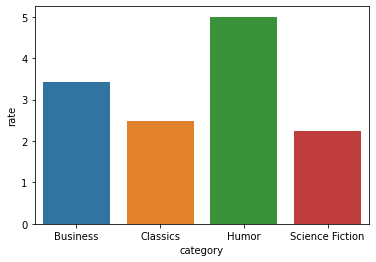

In [40]:
a=df_books[['category','rate']].groupby(['category']).mean().reset_index()
sns.barplot(x='category', y='rate', data=a );

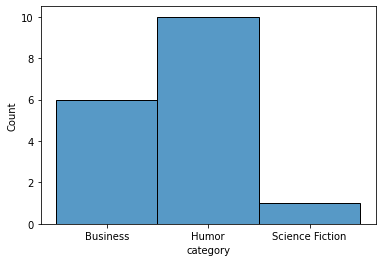

In [37]:
aux1 = df_books.loc[df_books['rate']==5,'category']
sns.histplot(aux1);

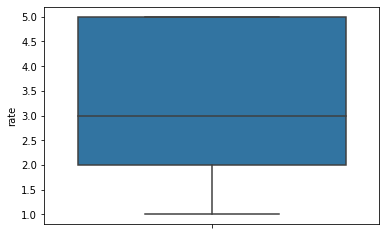

In [38]:
sns.boxplot(y='rate',data=df_books);

In [39]:
df_books[['category','rate']].groupby(['category']).mean().reset_index()


,category,rate
0,Business,3.416667
1,Classics,2.473684
2,Humor,5.000000
3,Science Fiction,2.250000


## 4.2 Qual produto mais barato  de cada categoria?

In [44]:
aux=df_books.sort_values('price', ascending=True).drop_duplicates(['category'])
aux[['title','price','category']]

,title,price,category
25,The Project,10.65,Science Fiction
13,Old School (Diary of a Wimpy Kid #10),11.83,Humor
1,The Third Wave: An Entrepreneurâs Vision of ...,12.61,Business
41,The Hound of the Baskervilles (Sherlock Holmes...,14.82,Classics


## 4.3 Qual produto mais barato  de cada categoria?

In [46]:
aux=df_books.sort_values('price', ascending=False).drop_duplicates(['category'])
aux[['title','price','category']]

,title,price,category
44,Candide,58.63,Classics
20,"Lamb: The Gospel According to Biff, Christ's C...",55.50,Humor
33,Dune (Dune #1),54.86,Science Fiction
9,"Rich Dad, Poor Dad",51.74,Business
